In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/Video Games Sales.csv')

In [3]:
df.head(5)

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


In [4]:
df.describe()


,index,Rank,Year,North America,Europe,Japan,Rest of World,Global,Review
count,1907.0000,1907.0000,1878.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000
mean,953.0000,954.0000,2003.766773,1.258789,0.706675,0.317493,0.206471,2.489240,79.038977
std,550.6478,550.6478,5.895369,1.956560,1.148904,0.724945,0.343093,3.563159,10.616899
min,0.0000,1.0000,1983.000000,0.000000,0.000000,0.000000,0.000000,0.830000,30.500000
25%,476.5000,477.5000,2000.000000,0.510000,0.230000,0.000000,0.060000,1.110000,74.000000
50%,953.0000,954.0000,2005.000000,0.810000,0.440000,0.020000,0.130000,1.530000,81.000000
75%,1429.5000,1430.5000,2008.000000,1.375000,0.810000,0.300000,0.220000,2.540000,86.230000
max,1906.0000,1907.0000,2012.000000,40.430000,28.390000,7.200000,8.540000,81.120000,97.000000


In [5]:
df.shape

(1907, 13)

In [6]:
df.dtypes

index              int64
Rank               int64
Game Title        object
Platform          object
Year             float64
Genre             object
Publisher         object
North America    float64
Europe           float64
Japan            float64
Rest of World    float64
Global           float64
Review           float64
dtype: object

In [7]:
duplicate_data = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_data.shape)

Number of duplicate rows:  (0, 13)


In [8]:
df.dropna()

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1902,1903,Lizzie McGuire 2: Lizzie Diaries,GBA,2004.0,Action,Disney Interactive Studios,0.60,0.22,0.00,0.01,0.83,55.00
1903,1903,1904,Xenoblade Chronicles,Wii,2010.0,Role-Playing,Nintendo,0.39,0.22,0.16,0.07,0.83,91.74
1904,1904,1905,SingStar Abba,PS3,2008.0,Misc,Sony Computer Entertainment,0.25,0.44,0.00,0.14,0.83,73.00
1905,1905,1906,FIFA Soccer World Championship,PS2,2000.0,Sports,Electronic Arts,0.27,0.21,0.28,0.07,0.83,73.00


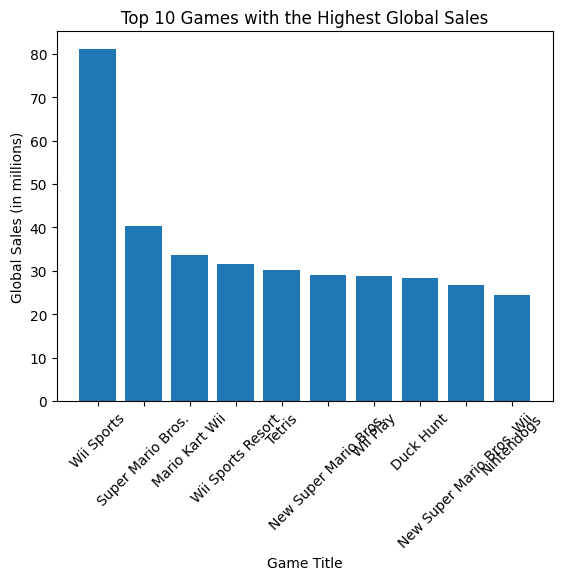

In [11]:
df = df.sort_values(by='Global', ascending=False)

top_10_games = df[:10]

plt.bar(top_10_games['Game Title'], top_10_games['Global'])

plt.title('Top 10 Games with the Highest Global Sales')
plt.xlabel('Game Title')
plt.ylabel('Global Sales (in millions)')

plt.xticks(rotation=45)


plt.show()


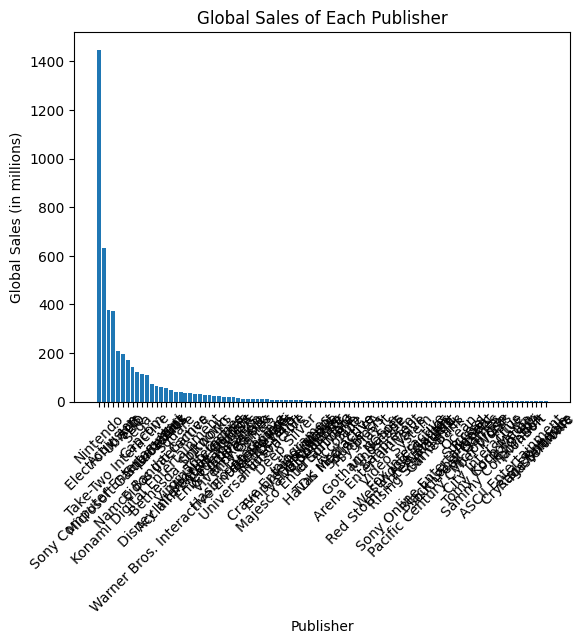

In [16]:
global_sales_by_publisher = df.groupby('Publisher')['Global'].sum()
global_sales_by_publisher = global_sales_by_publisher.sort_values(ascending=False)

plt.bar(global_sales_by_publisher.index, global_sales_by_publisher.values)

plt.title('Global Sales of Each Publisher')
plt.xlabel('Publisher')
plt.ylabel('Global Sales (in millions)')

plt.xticks(rotation=45)

plt.show()


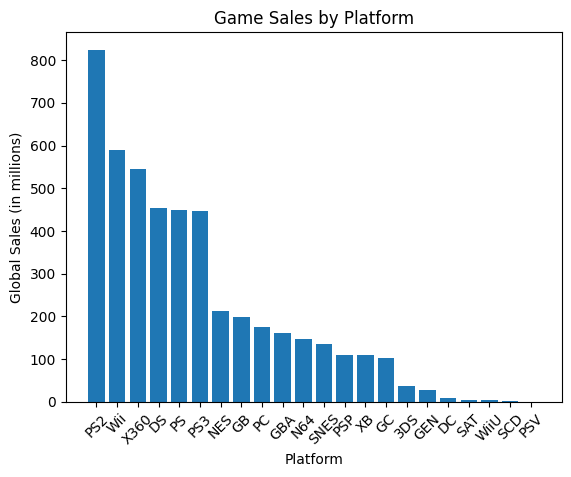

In [19]:
game_sales_by_platform = df.groupby('Platform')['Global'].sum()
game_sales_by_platform = game_sales_by_platform.sort_values(ascending=False)

plt.bar(game_sales_by_platform.index, game_sales_by_platform.values)

plt.title('Game Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')

plt.xticks(rotation=45)

plt.show()
